<a href="https://colab.research.google.com/github/varun-beep/Computer_VisionLab/blob/main/computer_vision_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def apply_filter(image, kernel, correlation=False):
    mode = cv2.BORDER_DEFAULT
    if correlation:
        return cv2.filter2D(image, -1, kernel, borderType=mode)  # Correlation
    return cv2.filter2D(image, -1, np.flip(kernel), borderType=mode)  # Convolution

def show_images(images, titles, cmap='gray'):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.show()

In [ ]:
image = cv2.imread('/content/F40.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
identity = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
edge_detection = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
sharpening = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
box_blur = np.ones((3, 3)) / 9
gaussian_blur = cv2.getGaussianKernel(3, 1) @ cv2.getGaussianKernel(3, 1).T

In [ ]:
filtered_images = [
    apply_filter(image, identity),
    apply_filter(image, edge_detection),
    apply_filter(image, sharpening),
    apply_filter(image, box_blur),
    apply_filter(image, gaussian_blur)
]

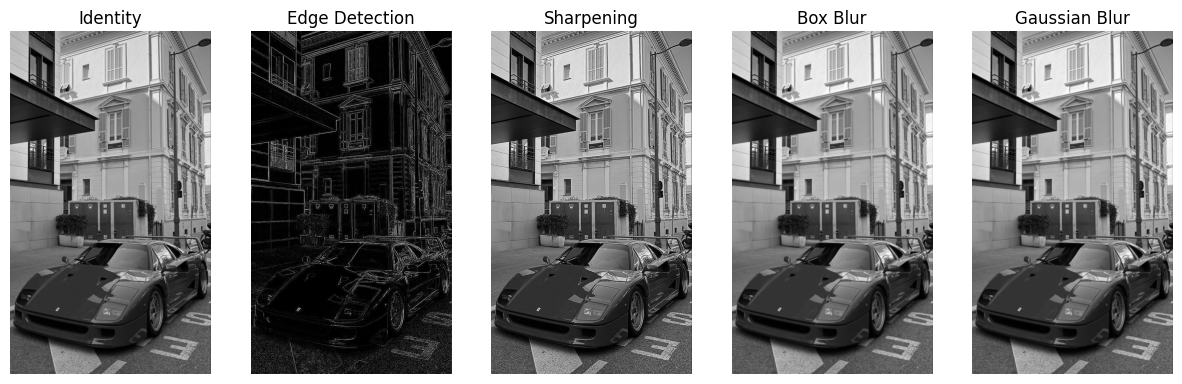

In [ ]:
show_images(filtered_images, ['Identity', 'Edge Detection', 'Sharpening', 'Box Blur', 'Gaussian Blur'])

In [ ]:
scales = 0.5  # Downscale factor
bilinear = cv2.resize(image, None, fx=scales, fy=scales, interpolation=cv2.INTER_LINEAR)
bicubic = cv2.resize(image, None, fx=scales, fy=scales, interpolation=cv2.INTER_CUBIC)
nearest = cv2.resize(image, None, fx=scales, fy=scales, interpolation=cv2.INTER_NEAREST)
lanczos = cv2.resize(image, None, fx=scales, fy=scales, interpolation=cv2.INTER_LANCZOS4)

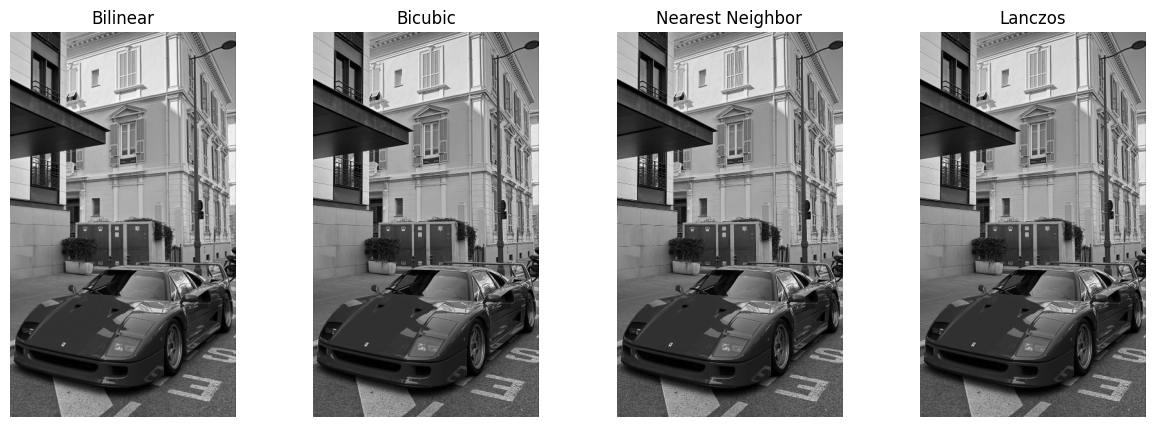

In [ ]:
show_images([bilinear, bicubic, nearest, lanczos], ['Bilinear', 'Bicubic', 'Nearest Neighbor', 'Lanczos'])